In [32]:
# Importa os pacotes necessários.
import networkx as nx
import pylab as plt
import numpy as np

# Ignora mensagens de warnings na hora de desenhar o grafo.
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

In [33]:
# Cria o objeto grafo.
g = nx.Graph()

# Lista de adjacência.
Ladj = [(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]

# Adiciona as arestas.
g.add_edges_from(Ladj)

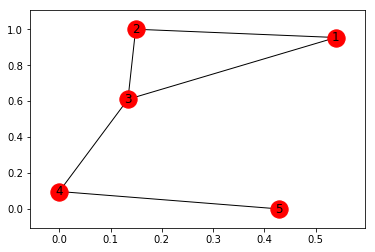

In [34]:
# Desenha o grafo
nx.draw_networkx(g)

### Exercício:

Dada uma matriz de adjacência Madj, calcule, sem usar bibliotecas específicas, os seguintes índices básicos:


 1) Ordem N e tamanho L;
 
 
 2) Os graus ki's dos vértices i's (i = 1, 2, 3, ..., N) e a respectiva média km;
 
 
 3) Os coeficientes de aglomeração ci's e a respectiva média cm;
 
 
 4) Os mínimos caminhos médios li's e a respectiva média lm;
 
 
 5) E o diâmetro Diam do grafo.

In [35]:
# Matriz de adjacência para o grafo da figura anterior.
Madj = np.array([[0, 1, 1, 0, 0],
                 [1, 0, 1, 0, 0],
                 [1, 1, 0, 1, 0],
                 [0, 0, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

In [56]:
# 1) Ordem N e tamanho L.
def N(Madj):
    return Madj.shape[0]

def L(Madj):
    return int(np.sum(Madj)/2)

# 2) Os graus ki's dos vértices i's (i = 1, 2, 3, ..., N) e a respectiva média km.
def kis(Madj):
    return np.sum(Madj, axis=0)

def km(Madj):
    return np.mean(kis(Madj))

# Os coeficientes de aglomeração ci's e a respectiva média cm.
def Eis(Madj):  
    pass